# Requirements 
1. Image Enhancement
2. Segmentation
3. Text detector
4. Orintation challenge

# Each of the following section will do one of the requirements as Experiments


# Image Enhancement Experiments ( 10 Nov )
1. Input: Capture Image
2. Output: Enhancemented Image
3. Procedures:
 1. convert the Image to Grayscale
 2. Do all the known enhancement techniques(Gamma correction, Contrast Enhancement, Histogram Equalization)
 3. Removing noise
 3. Output all the Enhancement Images

In [2]:
from commonfunctions import *
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
def contrast_enhancement(img):
    newimg=np.copy(img)
    for x in range(0,img.shape[0]):
        for y in range(0,img.shape[1]):
            if (img[x][y]*255 <= 100):
                newimg[x][y]= (1.5 * img[x][y]*255 + 50)/255
            else :
                 newimg[x][y]= img[x][y] 
    return newimg

def gamma_correction(img,c,gamma):
    newimg=np.copy(img)
    for x in range(0,img.shape[0]):
        for y in range(0,img.shape[1]):
            newimg[x][y]= c * (img[x][y] ** gamma) 
    return newimg

def histogram_equalization(img):
    newimg=np.copy(img)
    H = [0] * 256
    H_c = [0] * 256
    T = [0] * 256
    
    for x in range(0,img.shape[0]):
        for y in range(0,img.shape[1]):
            img[x][y] = img[x][y] * 255
            
            
    for x in range(0,img.shape[0]):
        for y in range(0,img.shape[1]):
            H[int(img[x][y])] +=1
    
    H_c[0] = H[0]
    
    for p in range(1,len(H)):
        H_c[p] = H_c[p-1] + H[p]
        
    for p in range(0,len(H)):
        T[p] = round(255 * (H_c[p]/(newimg.shape[0]*newimg.shape[1])))
    
    for x in range(0,img.shape[0]):
        for y in range(0,img.shape[1]):
            newimg[x][y] = T[int(img[x][y])]
    
    return newimg


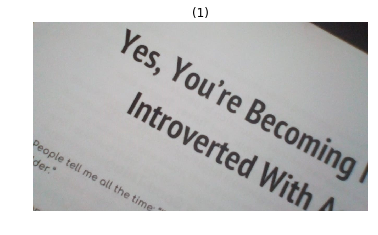

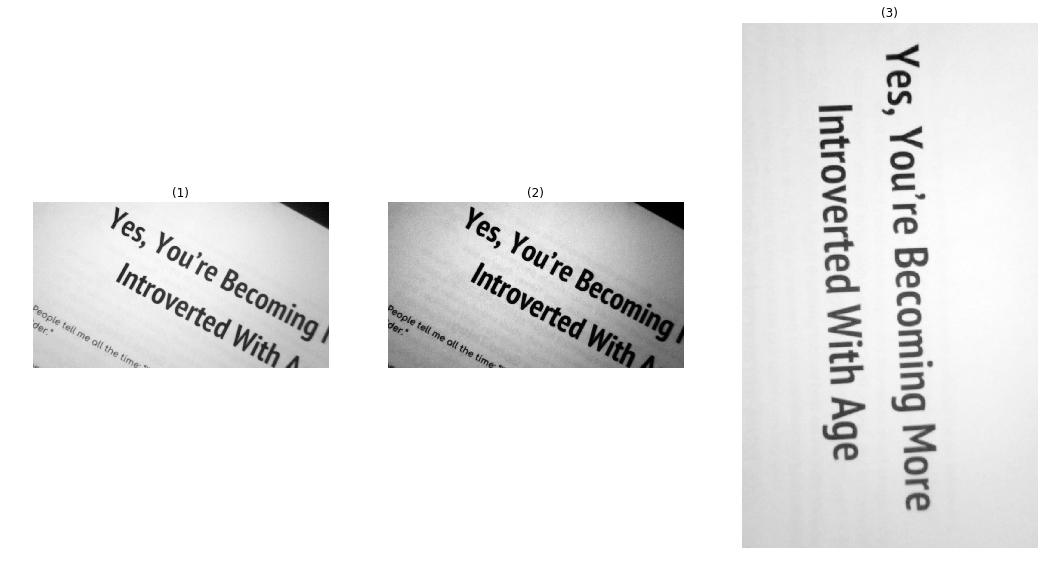

In [71]:
image = io.imread('Captured_images/oo_original.jpeg')
show_images([image])
gray=rgb2gray(image)

#contrast_transform = contrast_enhancement(gray)
#show_images([gray,contrast_transform])

gamma_correction_transform = gamma_correction(gray,1,3)
#gamma_correction_transform2 = gamma_correction(gray,1,0.3)
show_images([gray,gamma_correction_transform,gamma_correction_transform2])


#histogram_equalization_image = histogram_equalization(gray)
#show_images([gray,histogram_equalization_image])
#showHist(gray)
#showHist(histogram_equalization_image)

# Thresholding Experiments


40.5


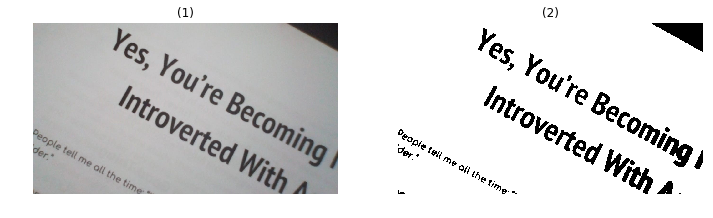

In [72]:
def get_threshold(image):
    img = np.copy(image)
    img = rgb2gray(img)
    img *= 255
    img = img.astype('uint8')
    H = [0] * 256
    for x in range(0,img.shape[0]):
        for y in range(0,img.shape[1]):
            H[int(img[x][y])] +=1
    suma = 0 
    for i in range(0,255):
        suma += i*H[i]
    Tinit = round( (suma) / (img.shape[0]*img.shape[1]))
    #print(img)
    #print(Tinit)
    threshold = Tinit
    threshold_old = 0
    cnt = 0
    while (threshold_old != threshold ):
        threshold_old = threshold
        suma1 = 0
        suma2 = 0
        for i in range(0,255):
            if H[i] < threshold_old:
                suma1 += i*H[i]
            else :
                suma2 += i*H[i]

        mean1 = round( (suma1) / (img.shape[0]*img.shape[1]))
        mean2 = round( (suma2) / (img.shape[0]*img.shape[1]))
        cnt +=1
        threshold = (mean1 + mean2) /2
    return threshold
    
    
def transform(image): 
    image = rgb2gray(image)
    T = get_threshold(image)
    image *= 255
    image = image.astype('uint8')
    final = np.copy(image)
    print(T)
    for i in range(0,image.shape[0]):
            for j in range(0,image.shape[1]):
                if image[i][j] < T:
                    final[i][j] = 0
                else:
                    final[i][j] = 1
                    
    return final
                
my_final = transform(gamma_correction_transform)                
show_images([image,my_final])

[[255   0   0 ... 255 255 255]
 [255   0   0 ... 255 255 255]
 [255   0   0 ... 255 255 255]
 ...
 [255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]]


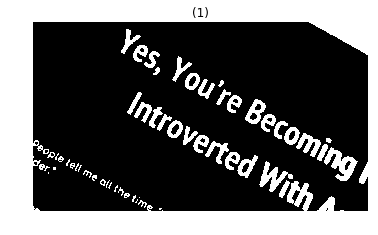

In [73]:
def Negative(img):
    newimg=np.copy(img)
    for x in range(0,img.shape[0]):
        for y in range(0,img.shape[1]):
            newimg[x][y]=255-img[x][y]
    return newimg

my_final_img = Negative(my_final*255)
print(my_final_img)
io.imsave("Captured_images/original2_thresholded.jpeg",my_final_img)
show_images([my_final_img])


# Text detection and Orientation Experiments

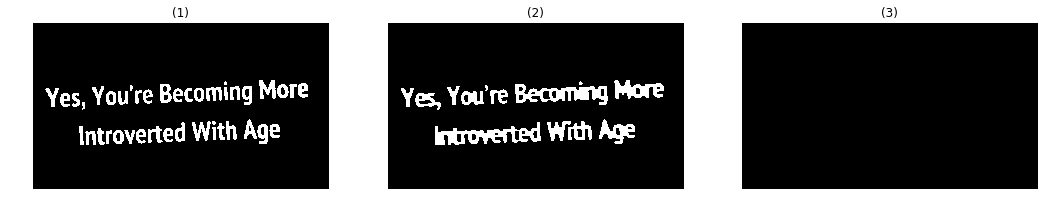

In [44]:
from skimage.measure import find_contours
def erosion(img,struc):
    output_image = np.copy(img)
    edgex = math.floor(struc.shape[0] /2 )
    edgey = math.floor(struc.shape[1] /2 )

    #colorArray = struc
    for x in range(edgex,img.shape[0]-edgex):
        for y in range(edgey,img.shape[1]-edgey):
            colorArray = np.zeros((struc.shape[0],struc.shape[1]))
            for fx in range(0,struc.shape[0]):
                for fy in range(0,struc.shape[1]):
                    if struc[fx][fy] == 1:
                        colorArray[fx][fy] = img[x+fx-edgex][y+fy-edgey]
                    else : 
                        colorArray[fx][fy] = 1
            colorArray.sort(axis=0)
            output_image[x][y] = np.amin(colorArray)

    return output_image


def dilation(img,struc):
    output_image = np.copy(img)
    edgex = math.floor(struc.shape[0] /2 )
    edgey = math.floor(struc.shape[1] /2 )

    #colorArray = struc
    for x in range(edgex,img.shape[0]-edgex):
        for y in range(edgey,img.shape[1]-edgey):
            colorArray = np.zeros((struc.shape[0],struc.shape[1]))
            for fx in range(0,struc.shape[0]):
                for fy in range(0,struc.shape[1]):
                    if struc[fx][fy] == 1:
                        colorArray[fx][fy] = img[x+fx-edgex][y+fy-edgey]
                    else : 
                        colorArray[fx][fy] = 0
            colorArray.sort(axis=0)
            output_image[x][y] = np.amax(colorArray)

    return output_image

def closing(img,struc):
    temp = np.copy(img)
    di_img = dilation(temp,struc)
    output = erosion(di_img,struc)
    return output
    
struc = np.array([
        [ 1,1,1,1,1,1,1,1,1,1,1,1],
        [ 1,1,1,1,1,1,1,1,1,1,1,1],
        [ 1,1,1,1,1,1,1,1,1,1,1,1]
    ])
    
struc2 = np.array([
        [ 1,1,1,1],
        [ 1,1,1,1],
        [ 1,1,1,1],
        [ 1,1,1,1],
        [ 1,1,1,1],
        [ 1,1,1,1],
        [ 1,1,1,1],
        [ 1,1,1,1],
        [ 1,1,1,1],
        [ 1,1,1,1],
        [ 1,1,1,1],
        [ 1,1,1,1],
        [ 1,1,1,1],
        [ 1,1,1,1],
        [ 1,1,1,1],
        [ 1,1,1,1]
        
    ])    
    
closing_img = closing(my_final_img,struc)

list1 = find_contours(closing_img,0.8)
#print(list1)

temp_list = []
for contour in list1:
    temp_contour_ = []
    y_list = contour[:,0]
    x_list = contour[:,1]
    
    xmin  = min(x_list)
    ymin = min(y_list)
    xmax = max(x_list) 
    ymax = max(y_list)
    temp_contour = math.floor(xmin), math.floor(xmax), math.floor(ymin), math.floor(ymax)
    
    temp_list.append(temp_contour)
        
img_with_boxes = np.zeros((my_final_img.shape[0],my_final_img.shape[1]))
#When provided with the correct format of the list of bounding_boxes, this section will set all pixels inside boxes in img_with_boxes
for box in temp_list:
    [Xmin, Xmax, Ymin, Ymax] = box
    rr, cc = rectangle(start = (Ymin,Xmin), end = (Ymax,Xmax), shape=my_final_img.shape)
    img_with_boxes[rr, cc] = 1 #set color white



show_images([my_final_img,closing_img,img_with_boxes]) #

# All the past was experiments.. Here is the core code
===================================================================================================================


# final Functions here

# Main Program 


In [74]:
input_name = input("Enter name of the input image: ")
output_name = input("Enter name of the output image: ")
input_path  = "Captured_images/" + input_name
output_path = "Captured_images/" + output_name
image = io.imread(input_path)
gray=rgb2gray(image)
gamma_correction_transform = gamma_correction(gray,1,3)
my_final = transform(gamma_correction_transform)                
my_final_img = Negative(my_final*255)
io.imsave(output_path,my_final_img)

Enter name of the input image: original2.jpeg
Enter name of the output image: original2_output.jpeg
43.0


# This part of code of (enhancement and thresholding) is basicly done. It's need improvement ofcourse. But It's work in the (best+Intermiediate base scenario). Improvement s are the following:
1. The Intensity of the Input must be unified so thresholding and enhancement works correctly in any case
2. Removing noise and smoothing quite
3. thresholding using partitioning to find local thresholding